In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy as sp
import os

from skimage import img_as_float
from skimage.morphology import reconstruction, h_maxima, h_minima
from skimage import morphology

In [2]:
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
import numpy as np
from skimage.morphology import h_maxima

In [2]:
# An Unsupervised Approach for Overlapping Cervical Cell Cytoplasm Segmentation

## 1) Cell clump segmentation
### - median filter (5 x 5)
### - adaptive histogram equalization
### - Cytoplasm: OTSU filtering
### - Nucleus: Global-Mean Threshold

## 2) Modified OTSU method with class prior probablility
### - OTSU and class prior probability (pixel * 0.05)

## 3) Cytoplasm segmentation
### - the distance regularized level set evolution

In [5]:
pathdir = '../images/LBC01/'
pathlist = [pathdir + p for p in os.listdir(pathdir)]
pathlist[0:5]

['../images/LBC01/LBC01-20210102(1)_228.png',
 '../images/LBC01/LBC01-20210102(1)_1771.png',
 '../images/LBC01/LBC01-20210102(1)_814.png',
 '../images/LBC01/LBC01-20210102(1)_378.png',
 '../images/LBC01/LBC01-20210102(1)_1268.png']

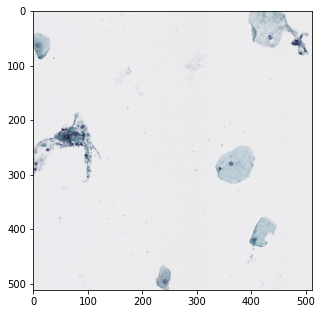

In [97]:
# img = cv2.imread("../../Dataset/papsmear/isbi2015/Training/frame014_stack/fov000.png")
img = cv2.imread(pathlist[290])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(5, 10))
plt.imshow(img);

In [104]:
# blur = cv2.GaussianBlur(img, (5,5), 0)
# filtered = cv2.subtract(img, blur)
# filtered = cv2.add(filtered, 127*np.ones(filtered.shape, np.uint8))
# plt.imshow(filtered)


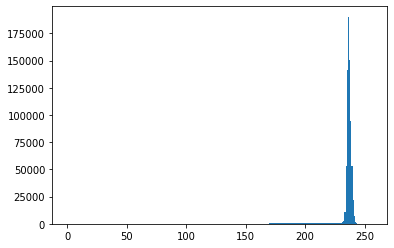

In [59]:
plt.hist(img.ravel(), 256, [0,256])
plt.show()

(512, 512)


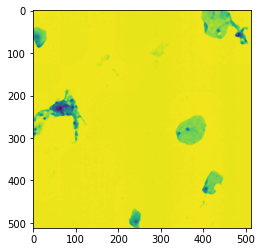

In [277]:
gridsize = 8
img = cv2.imread(pathlist[290])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.resize(img_gray, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img1 = cv2.medianBlur(img_gray,5)
clahe = cv2.createCLAHE(clipLimit=0.01,tileGridSize=(gridsize,gridsize))
ahe_img = clahe.apply(img1)
# ahe_img = cv2.equalizeHist(img1)
# marker = h_maxima(ahe_img, h=5)
marker = h_minima(ahe_img, h=40)
# marker1 = h_minima(marker, h=5)
print(marker.shape)
plt.imshow(ahe_img)

In [272]:
ahe_img[70][10]

156

In [267]:
np.where(ahe_img==0)

(array([], dtype=int64), array([], dtype=int64))

236.0


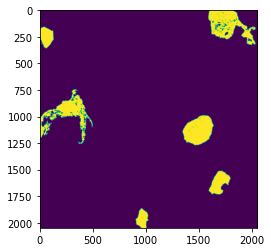

In [174]:
img = cv2.imread(pathlist[290])
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = np.median(gray_img.ravel())
print(median)
gray_img = gray_img < 220
removed_img = morphology.remove_small_objects(gray_img, min_size=10000)
removed_img = np.where(removed_img > 0, 1., 0.)
plt.imshow(removed_img)

In [210]:
# import numpy as np
# import cv2

# img = cv2.imread(pathlist[290])
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_gray = cv2.resize(img_gray, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
# img1 = cv2.medianBlur(img_gray,5)

# _, chromatid = cv2.threshold(img1, 220, 255, cv2.THRESH_BINARY)


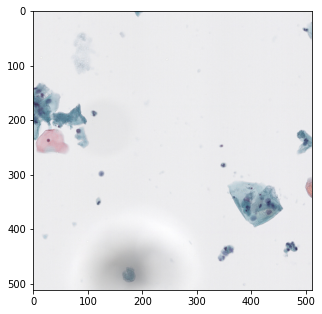

In [49]:
img = cv2.imread(pathlist[450])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(5, 10))
plt.imshow(img);

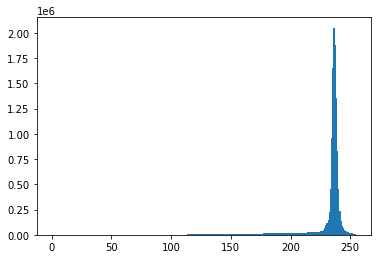

In [40]:
img = cv2.imread(pathlist[450])
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.resize(gray_img, dsize=(256,256))
# median = np.median(gray_img.ravel())
value, index, _ = plt.hist(img.ravel(), 255, [0,255])

In [41]:
print(np.argmax(value[1:] - value[:-1]))
print(np.max(value[1:] - value[:-1]))

234
687406.0


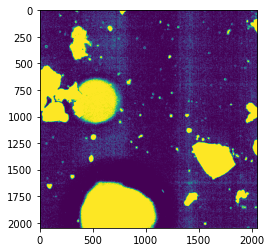

In [42]:
threshold = np.argmax(value[1:] - value[:-1])
img = cv2.imread(pathlist[450])
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img1 = gray_img < threshold
plt.imshow(gray_img1)

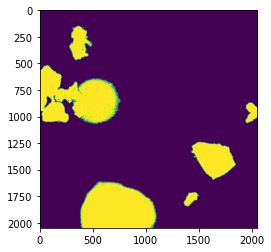

In [43]:
removed_img = morphology.remove_small_objects(gray_img1, min_size=10000)
removed_img = np.where(removed_img > 0, 1., 0.)
plt.imshow(removed_img)

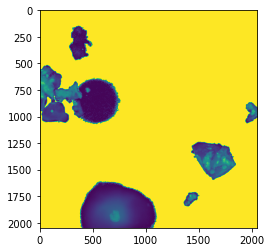

In [44]:
ahe_img = removed_img*gray_img
plt.imshow(removed_img*gray_img)
ahe_img = 255 -ahe_img
plt.imshow(ahe_img)

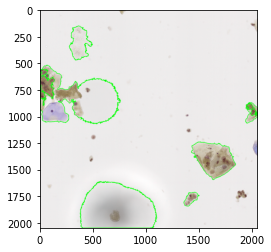

In [48]:
ret, imthres = cv2.threshold(ahe_img, 100, 255, cv2.THRESH_BINARY_INV)

imthres = imthres.astype(np.uint8)
# contour, _ = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour, _ = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img, contour, -1, (0,255,0), 4)
plt.imshow(img)

In [46]:
len(contour)

6

In [361]:
(ahe_img)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [349]:
np.unique(imthres)
# imthres.shape

array([  0., 255.])

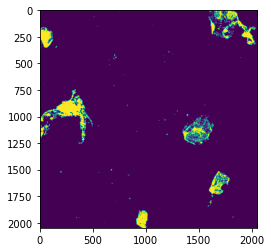

In [376]:
img = cv2.imread(pathlist[290])
img2 = img.copy()

# 그레이 스케일로 변환 ---①
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전 ---②
ret, imthres = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY_INV)

plt.imshow(imthres)

# # 가장 바깥쪽 컨투어에 대해 모든 좌표 반환 ---③
# contour, _ = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# # 가장 바깥쪽 컨투어에 대해 꼭지점 좌표만 반환 ---④
# contour2, _ = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# # 각각의 컨투의 갯수 출력 ---⑤
# print('도형의 갯수: %d(%d)'% (len(contour), len(contour2)))

# # 모든 좌표를 갖는 컨투어 그리기, 초록색  ---⑥
# cv2.drawContours(img, contour, -1, (0,255,0), 4)
# # 꼭지점 좌표만을 갖는 컨투어 그리기, 초록색  ---⑦
# cv2.drawContours(img2, contour2, -1, (0,255,0), 4)

In [377]:
imthres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

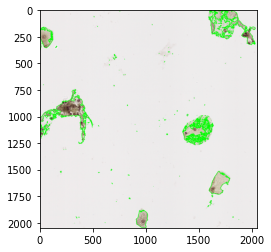

In [331]:
plt.imshow(img)